<a href="https://colab.research.google.com/github/albachiarabellaroba/HW3---Group-16/blob/main/main_Theoretical%20question.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Homework 3 - Places of the world**

In [1]:
from bs4 import BeautifulSoup as bs
from sklearn.feature_extraction.text import TfidfVectorizer
from numpy.linalg import norm 
from datetime import datetime
from functools import reduce
from tqdm import tqdm
import random as rdm
import pandas as pd
import numpy as np
import bs4
import requests
import os
import os.path
import lxml
import re
import codecs
import csv
import time
import pickle
import nltk

In [2]:
from google.colab import drive
drive.mount('/content/drive/') 

Mounted at /content/drive/


## 1. Data collection

### 1.1. Get the list of places

In [ ]:
linklist = open('/content/drive/MyDrive/ADM_HW3/linklist.txt', 'w')

for i in tqdm(range(1, 401)):
    link = 'https://www.atlasobscura.com/places?page='+str(i)+'&sort=likes_count'
    cont = requests.get(link)
    soup = BeautifulSoup(cont.content, features='lxml')
    for a in soup.find_all('a', class_='col-md-3 nav-card'):
        linklist.write(a.get('href')+'\n')
        
linklist.close()

100%|██████████| 400/400 [04:17<00:00,  1.55it/s]


### 1.2. Crawl places

In [ ]:
for i in tqdm(range(1, 401)):
    cart = '/content/drive/MyDrive/ADM_HW3/Html_page/page_{}'.format(i)
    os.makedirs(cart)
    
    f = open('/content/drive/MyDrive/ADM_HW3/linklist.txt', 'r', encoding='utf8')
    l = f.readlines()[(i-1)*18:(i)*18]
    l = [k.rstrip() for k in l]
    f.close

    m = 1+18*(i-1)

    for link in l:
      link = 'https://www.atlasobscura.com' + link
      html = requests.get(link)

      name = '{}/{}.html'.format(cart, m)
      text = open(name, 'w', encoding='utf8')
      text.write(html.text)
      text.close

      m=m+1


100%|██████████| 400/400 [29:55<00:00,  4.49s/it]


### 1.3 Parse downloaded pages

## 2. Search Engine

### 2.1.1 Create your index!

### 2.1.2 Execute the query

### 2.2 Conjunctive query & Ranking score

### 2.2.1 Inverted index

### 2.2.2 Execute the query

## 3. Define a new score!

## 4. Visualizing the most relevant places

## 5. BONUS: More complex search engine

## 6. Command line question

## 7. Theoretical question

1.Try solving the problem mentioned above using three different sorting algorithms (do not use any MapReduce algorithm). (Note: Built-in Python functions (like .mean, .sort, etc.) are not allowed to be used. You must implement the algorithms from scratch).

In [3]:
with open('ApplicantsInfo.txt', 'x') as f:
    url = f'https://adm2022.s3.amazonaws.com/ApplicantsInfo.txt'
    result = requests.get(url)
    soup = bs(result.text)
    s = soup.find_all('body')
    print(s)
    f.write(str(s))

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [4]:
Application = pd.read_csv('ApplicantsInfo.txt', header=None)

In [5]:
n =Application.iloc[0]
Application.drop(0, inplace=True)
N= int(n[0][10:15])
M= int(n[0][16:20])

In [93]:
newlist = []
students = []
average = []
for i in tqdm(range(N)):
    name = Application.iloc[i][0].split(' ')[0]
    surname = Application.iloc[i][0].split(' ')[1]
    grades = Application.iloc[i][0].split(' ')[2:]
    totalgrades = 0
    for i in grades:
        s = int(i)
        totalgrades += s
    avg = round(totalgrades/M,2)
    newlist.append((name, surname, avg))
    students.append((name, surname))
    average.append(avg)

100%|██████████| 50000/50000 [00:50<00:00, 994.32it/s] 


In [78]:
newlist[1]

('Paula', 'Ahmadi', 24.02)

In [79]:
students[1]

('Paula', 'Ahmadi')

In [80]:
average[1]

24.02

bubbleSort( )

In [59]:
def bubbleSort(average, students):
    n = len(average)

    swap = False
    
    for i in range(N):
        
        for j in range(0, n-i-1):
 
            if average[j] > average[j + 1]:
                swap = True
                average[j], average[j + 1] = average[j + 1], average[j]
                students[j], students[j + 1] = students[j + 1], students[j]
         
        if not swap: 

            return

In [60]:
bubbleSort(average, students)

571.566s

In [88]:
def bubbleSort2(newlist, average):
  n = len(average)
  
  swap = False
  
  for i in tqdm(range(n)):
    for j in range(0, n-i-1):
      if average[j] > average[j+1]:
        swap = True
        newlist[j], newlist[j+1] = newlist[j+1], newlist[j]

    if not swap: 
      
      return

In [89]:
bubbleSort2(newlist, average)

100%|██████████| 50000/50000 [06:33<00:00, 126.95it/s] 


393.506s

MergeSort( )

In [95]:
newlist[1]

('Paula', 'Ahmadi', 24.02)

In [96]:
students[1]

('Paula', 'Ahmadi')

In [97]:
average[1]

24.02

In [107]:
def MergeSort(newlist, average):
    if len(average) > 1:
 
        mid = len(average)//2
 
        left_avg = average[:mid]
        left_list = newlist[:mid]
 
        right_avg = average[mid:]
        right_list = newlist[mid:]
 
        MergeSort(left_avg, left_list)
 
        MergeSort(right_avg, right_list)
 
        i = j = k = 0
 
        while i < len(left_avg) and j < len(right_avg):
            if left_avg[i] <= right_avg[j]:
                average[k] = left_avg[i]
                newlist[k] = left_list[i]
                i += 1
            else:
                average[k] = right_avg[j]
                newlist[k] = right_list[j]
                j += 1
            k += 1
 
        while i < len(left_avg):
            average[k] = left_avg[i]
            newlist[k] = left_list[i]
            i += 1
            k += 1
 
        while j < len(right_avg):
            average[k] = right_avg[j]
            
            newlist[k] = right_list[j]
            j += 1
            k += 1

            return

In [108]:
MergeSort(newlist, average)

QuickSort( )

In [122]:
newlist[1]

('Alexander', 'Spring', 23.74)

In [123]:
average[1]

23.54

In [124]:
def QuickSort1(newlist, students, average, start, end):
    if start >= end:
        return
    mid = average[start]
    left = start
    right = end
    while left < right:
        while left < right and average[right] >= mid:
            right -= 1
        average[left] = average[right]
        newlist[left] = newlist[right]

        while left < right and average[left] < mid:
            left += 1

        average[right] = average[left]
        newlist[left] = newlist[right]

    average[left] = mid

    QuickSort1(average, start, left-1)

    QuickSort1(average, left+1, end)

In [125]:
def partition(arr,li,left,right):  
    tmp = li[left]
    while left < right:
        while left < right and li[right] >= tmp:
            right -= 1
        li[left] = li[right]
        arr[left] = arr[right]
        
        while left < right and li[left] <= tmp:
            left += 1
        li[right] = li[left]
        arr[left] = arr[right]

    li[left] = tmp
    return  left

In [126]:
def QuickSort2(arr,li,left,right):  
    if left < right :
        mid = partition(arr,li,left,right)
        QuickSort2(arr,li,left,mid-1)
        QuickSort2(arr,li,mid+1,right)

In [128]:
import sys
sys.setrecursionlimit(1000000)


In [129]:
sys.getrecursionlimit()

1000000

In [ ]:
QuickSort2(newlist,average,0,len(average)-1)

2.What is the time complexity of each algorithm you have used?

BubbleSort

Bubble sort has a total of (n-1) cycles, and each cycle requires the current n-1 comparisons, so the total number of comparisons is:
(n-1) + (n-2) + (n-3) + … + 1 = n*(n-1)/2;
So the time complexity of bubble sort is O(n2)

MergeSort

Merge sort on n elements can be seen as merge sort on two sets of n/2 elements and call the Merge function once, so:

T(n)=2T(n/2)+an=4T(n/4)+2an=…=2kT(n/2k)+k

until n/2k=1

Then T(n)=2kT(1)+k=n+a*(log2n)n

The time complexity is O(nlogn)

QuickSort

in the best case

Partition is divided evenly every time. If n keywords are sorted, the depth of the recursive tree is log ⁡ 2 ( 2 n + 1 ) , the number of nodes is n \log_2(2n+1), and the number of nodes is nlog2(2n+1), the number of nodes is n

For example 2 nodes with a depth of 2.

The first Partiation should be to scan the entire array and do n comparisons.

The obtained pivot divides the array into two, then each requires T(n/2) time (note that it is the best case, so the two halves are equally divided) into 2 pieces: T ( n ) ≤ 2 T ( n / 2 ) + n , T ( 1 ) = 0 , where n = ( log ⁡ 2 2 ) × n is divided into 2 blocks: T(n) ≤ 2T(n/2) +n, T(1)=0, where n= (\log_22)\times n
Divided into 2 blocks: T(n)≤2T(n/2)+n, T(1)=0, where
n=(log2/2)×n

Continuing to divide, we have the following inequality inference
Divide into 4 pieces: T ( n ) ≤ 2 ( 2 T ( n / 4 ) + n / 2 ) + n = 4 T ( n / 4 ) + 2 n , where 2 n = ( log ⁡ 2 4 ) × n divide 4 blocks: T(n)≤2(2T(n/4)+n/2) +n=4T(n/4)+2n, where 2n=(\log_24)\times n
Divided into 4 blocks: T(n)≤2(2T(n/4)+n/2)+n=4T(n/4)+2n,
where 2n=(log2/4)×n

Divided into 8 pieces: T(n) ≤ 4 ( 2 T(n/8) + n/4) + 2 n = 8 T(n/8) + 3 n... Divided into 8 pieces: T(n) ≤ 4( 2T(n/8)+n/4)+2n=8T(n/8)+3n  …
Divided into 8 blocks: T(n)≤4(2T(n/8)+n/4)+2n=8T(n/8)+3n…

Divide into n pieces: T ( n ) ≤ n T ( 1 ) + ( log ⁡ 2 n ) × n = O ( n log ⁡ 2 n ) Divide into n pieces: T(n)≤nT(1)+(\log_2n) ×n= O(n\log_2n)
Divided into n blocks: T(n)≤nT(1)+(log
2
​
 n)×n=O(nlog
2
​
 n)

That is to say, in the optimal case, the time complexity of the quicksort algorithm is O(nlogn).

The sequence to be sorted is in positive or reverse order. Each division only gets a subsequence with one record less than the previous division. Note that the other is empty. If the recursion tree is drawn, it is a sloping tree.

At this time, n-1 recursive calls need to be performed, and the i-th division requires n-i keyword comparisons to find the i-th record, which is the position of the pivot, so the number of comparisons is
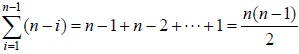
The time complexity is O(n^2).

3.Evaluate the time taken for each of your implementations to answer the query stored in the ApplicantsInfo.txt file and visualize them.

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
algorithms = ['Bubble Sort', 'Dynamic Insertion Sort', 'Merge Sort']
times = [259.02, 151.49, 143.85]

plt.bar(algorithms,times, color ='maroon',
        width = 0.4)
 

plt.ylabel("Running Time (seconds)")
plt.title("Running Times for N=50000")
plt.show()

4.What is the most optimal algorithm, in your opinion, and why?

QuickSort

5.Implement a sorting algorithm using MapReduce and compare it against the three algorithms previously implemented using the ApplicantsInfo.txt file.